In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('data/peoplecount.csv')
print(df.info())
print('')
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 13 columns):
dep_time          328521 non-null float64
sched_dep_time    336776 non-null int64
dep_delay         328521 non-null float64
arr_time          328063 non-null float64
sched_arr_time    336776 non-null int64
arr_delay         327346 non-null float64
floorr            336776 non-null object
activate          336776 non-null int64
address           334280 non-null object
origin            336776 non-null object
cordinate         336776 non-null object
distance          336776 non-null int64
time_hour         336776 non-null object
dtypes: float64(4), int64(4), object(5)
memory usage: 33.4+ MB
None



,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,floorr,activate,address,origin,cordinate,distance,time_hour
0,517.0,515,2.0,830.0,819,11.0,1,1545,Muradiye,R101,"38.70521,27.39111",1400,1/1/2018 05:00
1,533.0,529,4.0,850.0,830,20.0,2,1714,Muradiye,R102,"38.70521,27.39111",1416,1/1/2018 05:00
2,542.0,540,2.0,923.0,850,33.0,3,1141,Muradiye,R103,"38.70521,27.39111",1089,1/1/2018 05:00
3,544.0,545,-1.0,1004.0,1022,-18.0,1,725,Muradiye,R103,"38.70521,27.39111",1576,1/1/2018 05:00
4,554.0,600,-6.0,812.0,837,-25.0,1,461,Muradiye,R102,"38.70521,27.39111",762,1/1/2018 06:00


In [21]:
df["r_out"]=abs(df["dep_delay"])
df["r_in"]=abs(df["arr_delay"])
df.to_csv('data/peoplecount1.csv')

df.head()


,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,floorr,activate,address,origin,...,time_hour,r_out,r_in,date,year,month,day,hour,minute,day_of_week
0,517.0,515,2.0,830.0,819,11.0,1,1545,Muradiye,R101,...,2018-01-01 05:00:00,2.0,11.0,2018-01-01,2018,1,1,5,0,0
1,533.0,529,4.0,850.0,830,20.0,2,1714,Muradiye,R102,...,2018-01-01 05:00:00,4.0,20.0,2018-01-01,2018,1,1,5,0,0
2,542.0,540,2.0,923.0,850,33.0,3,1141,Muradiye,R103,...,2018-01-01 05:00:00,2.0,33.0,2018-01-01,2018,1,1,5,0,0
3,544.0,545,-1.0,1004.0,1022,18.0,1,725,Muradiye,R103,...,2018-01-01 05:00:00,1.0,18.0,2018-01-01,2018,1,1,5,0,0
4,554.0,600,-6.0,812.0,837,25.0,1,461,Muradiye,R102,...,2018-01-01 06:00:00,6.0,25.0,2018-01-01,2018,1,1,6,0,0


**Kütüphanelerimizi ve veri setimizi yüklüyoruz. Sonrasında veri tiplerini ve eksik verimizin olup olmadığını kontrol ediyoruz.**

**time_hour değişkenimizin tipi 'object' zaman serisi analizleri için değişkenimizin tipini datetime yapıyoruz ve değişiklikleri kontrol ediyoruz.**




In [3]:
df['time_hour'] = pd.to_datetime(df['time_hour'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 15 columns):
dep_time          328521 non-null float64
sched_dep_time    336776 non-null int64
dep_delay         328521 non-null float64
arr_time          328063 non-null float64
sched_arr_time    336776 non-null int64
arr_delay         327346 non-null float64
floorr            336776 non-null object
activate          336776 non-null int64
address           334280 non-null object
origin            336776 non-null object
cordinate         336776 non-null object
distance          336776 non-null int64
time_hour         336776 non-null datetime64[ns]
r_out             328521 non-null float64
r_in              327346 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(4), object(4)
memory usage: 38.5+ MB


In [4]:
df['date'] = df['time_hour'].map(lambda x: x.strftime('%Y-%m-%d'))
df['year'] = df['time_hour'].dt.year
df['month'] = df['time_hour'].dt.month
df['day'] = df['time_hour'].dt.day
df['hour'] = df['time_hour'].dt.hour
df['minute'] = df['time_hour'].dt.minute
df['day_of_week'] = df['time_hour'].dt.dayofweek
df.head()
#day of week 0 pazartesi 6 pazar

,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,floorr,activate,address,origin,...,time_hour,r_out,r_in,date,year,month,day,hour,minute,day_of_week
0,517.0,515,2.0,830.0,819,11.0,1,1545,Muradiye,R101,...,2018-01-01 05:00:00,2.0,11.0,2018-01-01,2018,1,1,5,0,0
1,533.0,529,4.0,850.0,830,20.0,2,1714,Muradiye,R102,...,2018-01-01 05:00:00,4.0,20.0,2018-01-01,2018,1,1,5,0,0
2,542.0,540,2.0,923.0,850,33.0,3,1141,Muradiye,R103,...,2018-01-01 05:00:00,2.0,33.0,2018-01-01,2018,1,1,5,0,0
3,544.0,545,-1.0,1004.0,1022,-18.0,1,725,Muradiye,R103,...,2018-01-01 05:00:00,1.0,18.0,2018-01-01,2018,1,1,5,0,0
4,554.0,600,-6.0,812.0,837,-25.0,1,461,Muradiye,R102,...,2018-01-01 06:00:00,6.0,25.0,2018-01-01,2018,1,1,6,0,0


Text(0, 0.5, 'minutes')

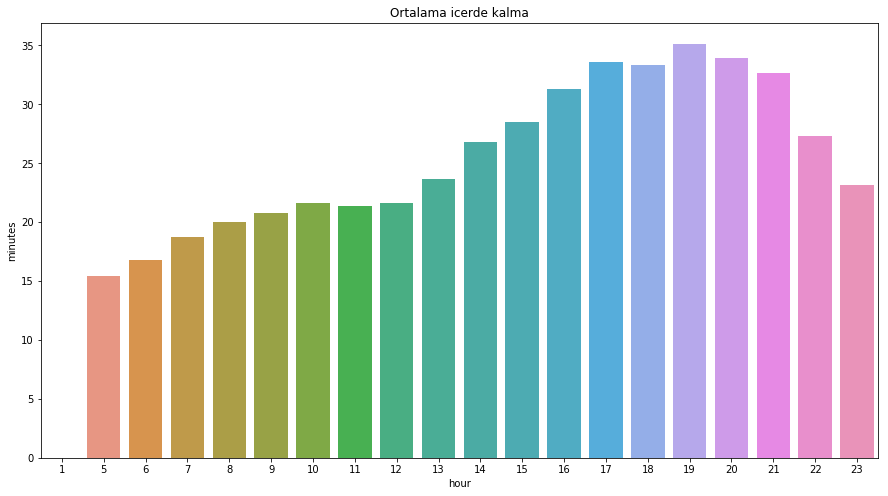

In [5]:
plt.figure(figsize=(15,8))
ax = sns.barplot(x=df.groupby('hour').r_in.mean().index, y=df.groupby('hour').r_in.mean().values, data=df)
ax.set_title('Ortalama icerde kalma')
ax.set_ylabel('minutes')

**Aynı çalışmayı haftanın günleri için de basitçe yapabiliriz.**

Text(0, 0.5, 'minutes')

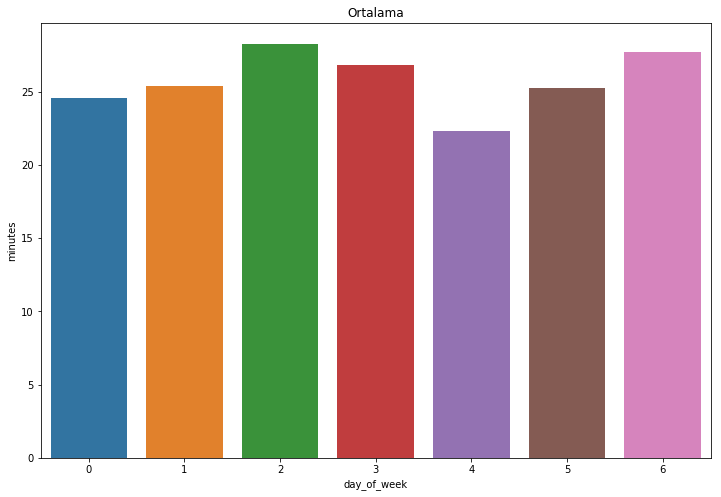

In [6]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x=df.groupby('day_of_week').r_in.mean().index, y=df.groupby('day_of_week').r_in.mean().values, data=df)
ax.set_title('Ortalama')
ax.set_ylabel('minutes')

**Verimizi aylık, haftalık ve günlük olarak gruplandırıp özniteliklerimizin ortalamasını,  medyanını, toplamını, en küçük, en büyük değerleri kolayca bulabiliriz. Resample zaman serisi analizi .**

In [7]:
df.resample('M', on = 'time_hour').mean()

,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,activate,distance,r_out,r_in,year,month,day,hour,minute,day_of_week
time_hour,,,,,,,,,,,,,,,,
2018-01-31,1347.211796,1340.909532,10.036665,1523.161894,1547.598060,6.129972,1958.625426,1006.843616,15.746668,22.995265,2018.0,1.0,15.991261,13.157125,0.0,2.756814
2018-02-28,1347.577839,1342.478257,10.816843,1522.212933,1547.110056,5.613019,1956.268406,1000.982285,16.373786,23.209225,2018.0,2.0,14.743617,13.172458,0.0,2.945894
2018-03-31,1359.504594,1354.202990,13.227076,1509.747629,1546.235312,5.807577,2003.472428,1011.987099,18.522111,25.946563,2018.0,3.0,15.995665,13.287577,0.0,3.045710
2018-04-30,1353.272938,1351.048923,13.938038,1500.709920,1536.895199,11.176063,1978.577939,1038.732580,19.743186,27.656109,2018.0,4.0,15.429827,13.250053,0.0,2.954536
2018-05-31,1351.172812,1345.299555,12.986859,1502.688739,1533.466245,3.521509,1986.241040,1040.912905,18.403145,26.823699,2018.0,5.0,15.993020,13.186623,0.0,2.836783
2018-06-30,1350.844936,1346.389619,20.846332,1467.999926,1526.864922,16.481330,1935.192048,1057.125235,25.427003,33.098800,2018.0,6.0,15.598626,13.192083,0.0,3.049818
2018-07-31,1353.163525,1347.332846,21.727787,1455.948383,1520.663144,16.711307,1958.943415,1058.596398,25.937160,34.027109,2018.0,7.0,16.193373,13.202515,0.0,2.899881
2018-08-31,1350.240595,1344.880349,12.611040,1495.373339,1519.396631,6.040652,1960.480956,1062.138439,17.664887,25.917617,2018.0,8.0,15.833907,13.179561,0.0,2.946091
2018-09-30,1334.112197,1334.660151,6.722476,1503.555006,1534.134692,-4.018364,2026.244506,1041.249946,13.837512,23.686931,2018.0,9.0,15.601581,13.082904,0.0,3.108145


In [8]:
df.resample('W', on = 'time_hour').mean().head(10)

,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,activate,distance,r_out,r_in,year,month,day,hour,minute,day_of_week
time_hour,,,,,,,,,,,,,,,,
2018-01-07,1358.577836,1350.451877,9.200858,1535.506352,1549.848500,3.891114,1894.208887,1044.133137,13.758245,20.812841,2018.0,1.000000,3.976554,13.244958,0.0,2.976554
2018-01-14,1336.400528,1340.903257,4.845596,1516.620439,1542.793092,-1.061900,1970.717630,998.054346,11.841636,19.861304,2018.0,1.000000,10.950401,13.159601,0.0,2.950401
2018-01-21,1345.486756,1337.445663,8.281087,1529.501856,1547.687604,6.782006,1970.687936,1000.069791,14.369496,21.346863,2018.0,1.000000,17.928714,13.123795,0.0,2.928714
2018-01-28,1348.933311,1338.000000,13.921124,1514.541067,1550.610066,10.565321,1973.810726,995.619307,19.259309,26.175772,2018.0,1.000000,24.951485,13.130198,0.0,2.951485
2018-02-04,1348.746484,1337.952734,13.470154,1532.790486,1550.210474,9.051008,1973.044960,996.361660,19.178559,25.666896,2018.0,1.552372,14.828393,13.129611,0.0,2.951910
2018-02-11,1339.594245,1338.312080,14.398317,1517.049235,1551.065399,10.958538,1975.186199,995.222750,19.458407,25.572804,2018.0,2.000000,7.951975,13.132929,0.0,2.951975
2018-02-18,1344.584112,1344.795204,6.487270,1526.276802,1546.487130,0.010501,1949.229097,1005.410871,12.176926,20.387237,2018.0,2.000000,14.969145,13.193445,0.0,2.969145
2018-02-25,1351.210568,1345.656709,10.582990,1511.657402,1543.261026,7.242598,1944.376759,1004.236628,16.372897,22.532315,2018.0,2.000000,21.952768,13.202690,0.0,2.952768
2018-03-04,1358.565856,1348.739938,11.535060,1520.467816,1547.118885,1.564212,1968.735759,1006.154025,17.320910,25.923357,2018.0,2.559288,13.317337,13.234830,0.0,2.977399


In [9]:
df.resample('D', on = 'time_hour').mean().head(10)

,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,activate,distance,r_out,r_in,year,month,day,hour,minute,day_of_week
time_hour,,,,,,,,,,,,,,,,
2018-01-01,1384.997613,1372.363420,11.548926,1562.356033,1567.661520,12.651023,1821.496437,1077.429929,15.892601,23.387485,2018.0,1.0,1.0,13.465558,0.0,0.0
2018-01-02,1353.960428,1340.580064,13.858824,1532.729904,1539.181336,12.692888,1917.732768,1053.117709,17.550802,24.238147,2018.0,1.0,2.0,13.147402,0.0,1.0
2018-01-03,1356.671460,1344.485777,10.987832,1536.301991,1542.631291,5.733333,1913.176149,1037.370897,15.056416,22.542222,2018.0,1.0,3.0,13.178337,0.0,2.0
2018-01-04,1347.856986,1341.010929,8.951595,1519.133113,1541.072131,-1.932819,1930.147541,1032.475410,13.594059,20.452643,2018.0,1.0,4.0,13.148634,0.0,3.0
2018-01-05,1326.089261,1326.008333,5.732218,1509.143654,1524.498611,-1.525802,1740.019444,1067.591667,10.599721,16.502092,2018.0,1.0,5.0,12.997222,0.0,4.0
2018-01-06,1399.055355,1392.884615,7.148014,1573.000000,1596.028846,4.236429,1902.792067,1051.646635,11.598075,18.166466,2018.0,1.0,6.0,13.669471,0.0,5.0
2018-01-07,1340.624731,1336.782422,5.417204,1516.179570,1538.613076,-4.947312,1993.561629,998.257235,11.286022,19.454839,2018.0,1.0,7.0,13.116827,0.0,6.0
2018-01-08,1334.985475,1334.395996,2.553073,1533.889385,1535.798665,-3.227578,2008.276974,985.532814,9.029050,16.045964,2018.0,1.0,8.0,13.096774,0.0,0.0
2018-01-09,1326.500557,1334.567627,2.276477,1522.879330,1538.498891,-0.264278,2017.395787,981.420177,9.841695,16.741321,2018.0,1.0,9.0,13.101996,0.0,1.0


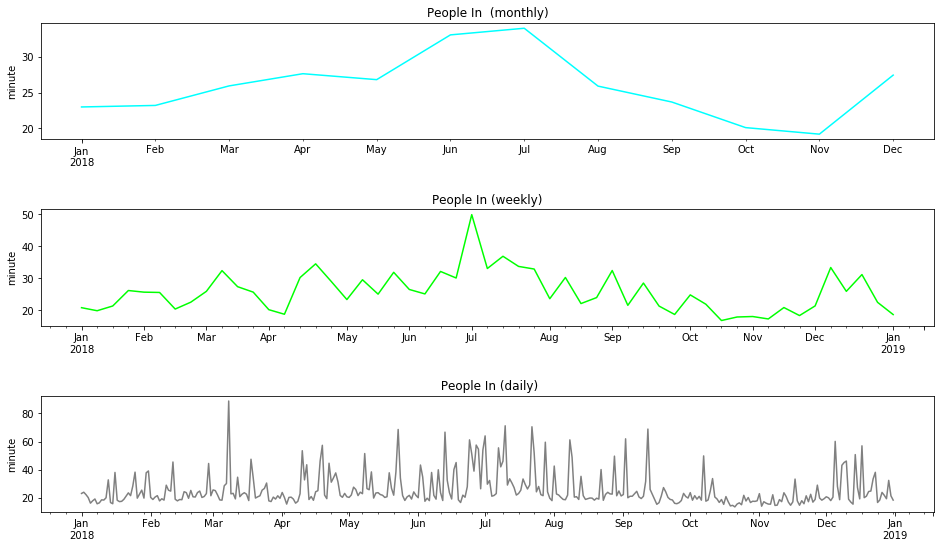

In [10]:
import matplotlib.pyplot as plt
f,ax=plt.subplots(3,1,figsize=(16,9))

df1 = df.resample('M', on='time_hour').mean()
df2 = df.resample('W', on='time_hour').mean()
df3 = df.resample('D', on='time_hour').mean()

df1['r_in'].plot(ax = ax[0], color = 'cyan')
ax[0].set_title('People In  (monthly)')
ax[0].set_xlabel('')
ax[0].set_ylabel('minute')

df2['r_in'].plot(ax = ax[1], color = 'lime')
ax[1].set_title('People In (weekly)')
ax[1].set_xlabel('')
ax[1].set_ylabel('minute')

df3['r_in'].plot(ax = ax[2], color = 'grey')
ax[2].set_title(' People In (daily)')
ax[2].set_xlabel('')
ax[2].set_ylabel('minute')
    
f.subplots_adjust(hspace=0.6)
plt.show()

** süresinin son 6 değeri eksik, eksik değerleri 'forward-fill' metoduyla doldurabiliriz.**

In [11]:
print('before')
print('')
print(df.r_in.tail(10))
print('')
print('after')
print('')
df.arr_delay = df.r_in.fillna(method='ffill')
df.arr_delay.tail(10)

before

336766    20.0
336767    16.0
336768     1.0
336769    25.0
336770     NaN
336771     NaN
336772     NaN
336773     NaN
336774     NaN
336775     NaN
Name: r_in, dtype: float64

after



336766    20.0
336767    16.0
336768     1.0
336769    25.0
336770    25.0
336771    25.0
336772    25.0
336773    25.0
336774    25.0
336775    25.0
Name: arr_delay, dtype: float64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 22 columns):
dep_time          328521 non-null float64
sched_dep_time    336776 non-null int64
dep_delay         328521 non-null float64
arr_time          328063 non-null float64
sched_arr_time    336776 non-null int64
arr_delay         336776 non-null float64
floorr            336776 non-null object
activate          336776 non-null int64
address           334280 non-null object
origin            336776 non-null object
cordinate         336776 non-null object
distance          336776 non-null int64
time_hour         336776 non-null datetime64[ns]
r_out             328521 non-null float64
r_in              327346 non-null float64
date              336776 non-null object
year              336776 non-null int64
month             336776 non-null int64
day               336776 non-null int64
hour              336776 non-null int64
minute            336776 non-null int64
day_of_week       33677

# plt.figure(figsize=(12,8))
sns.barplot(x="r_in", y="r_out", data=df, hue="dep_delay", palette='inferno')
plt.xticks(rotation=70)